In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()  # Display information of the 'data' DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Convert categorical variables into dummy variables using one-hot encoding
bank=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome'])
bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,no,29,yes,no,5,may,151,1,-1,...,True,False,False,False,False,True,False,False,False,True
2,33,no,2,yes,yes,5,may,76,1,-1,...,True,False,False,False,False,True,False,False,False,True
3,47,no,1506,yes,no,5,may,92,1,-1,...,False,False,True,False,False,True,False,False,False,True
4,33,no,1,no,no,5,may,198,1,-1,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,False,True,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,nov,456,2,-1,...,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,nov,1127,5,184,...,True,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,nov,508,4,-1,...,True,False,False,False,True,False,False,False,False,True


In [6]:
pd.set_option("display.max.columns", None)  # Setting the Pandas display option to show all columns
bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
1,44,no,29,yes,no,5,may,151,1,-1,0,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True
4,33,no,1,no,no,5,may,198,1,-1,0,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True


In [7]:
# Convert categorical columns containing 'yes' and 'no' to numerical values (1 for 'yes', 0 for 'no')
bank['default'] = np.where(bank['default'].str.contains("yes"), 1, 0)
bank['housing'] = np.where(bank['housing'].str.contains("yes"), 1, 0)
bank['loan'] = np.where(bank['loan'].str.contains("yes"), 1, 0)
bank['y'] = np.where(bank['y'].str.contains("yes"), 1, 0)
bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,5,may,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
2,33,0,2,1,1,5,may,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
3,47,0,1506,1,0,5,may,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True
4,33,0,1,0,0,5,may,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True


Text(0.5, 1.0, 'default')

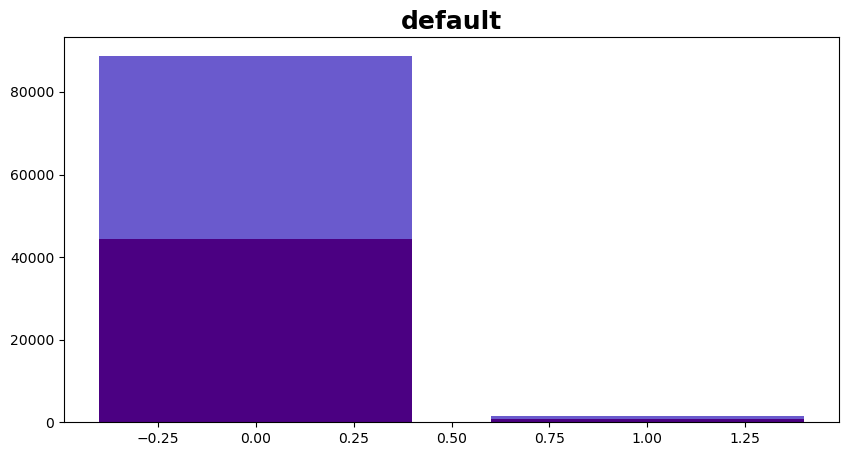

In [14]:
plt.figure(figsize=(10,5))
b1 = plt.bar(bank['default'].unique(),height = bank['default'].value_counts(),color='#4b0082')
b2 = plt.bar(bank['default'].unique(),height = bank['default'].value_counts(),bottom = bank['default'].value_counts(),color = '#6a5acd') 
plt.title("default" ,fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'housing ')

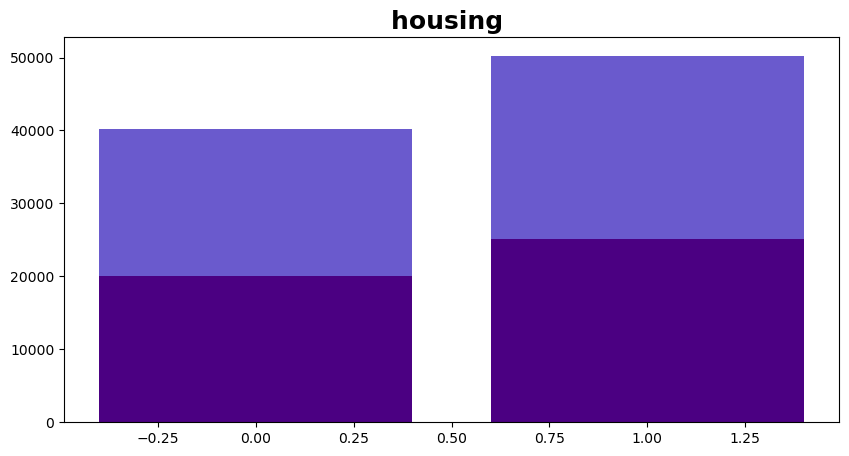

In [15]:
plt.figure(figsize=(10,5))
b1 = plt.bar(bank['housing'].unique(),height = bank['housing'].value_counts(),color='#4b0082')
b2 = plt.bar(bank['housing'].unique(),height = bank['housing'].value_counts(),bottom = bank['housing'].value_counts(),color = '#6a5acd') 
plt.title("housing " ,fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'loan')

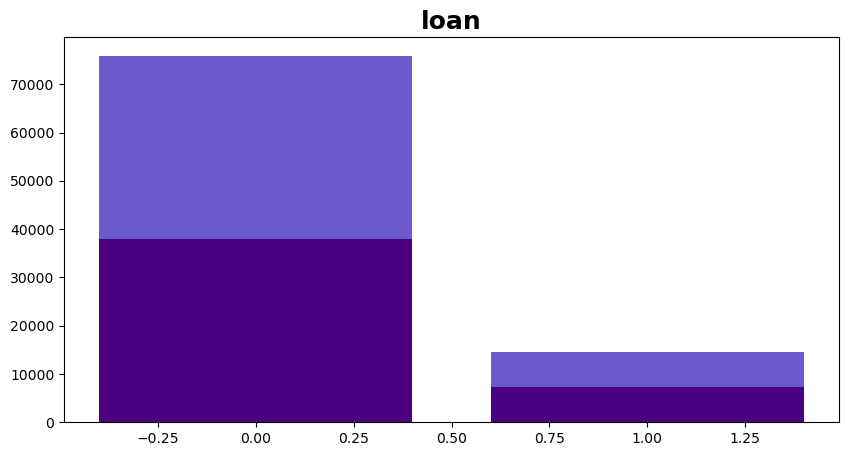

In [16]:
plt.figure(figsize=(10,5))
b1 = plt.bar(bank['loan'].unique(),height = bank['loan'].value_counts(),color='#4b0082')
b2 = plt.bar(bank['loan'].unique(),height = bank['loan'].value_counts(),bottom = bank['loan'].value_counts(),color = '#6a5acd') 
plt.title("loan" ,fontsize=18, fontweight='bold')

In [17]:
bank['month'].value_counts()  # Display the count of occurrences for each unique value in the 'month' column

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [18]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [19]:
bank=bank.replace(order)   # Replace 'order' in the 'bank' variable
bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,5,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
2,33,0,2,1,1,5,5,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
3,47,0,1506,1,0,5,5,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True
4,33,0,1,0,0,5,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
45209,57,0,668,0,0,17,11,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True


# Model Building

In [20]:
# Concatenate data from the 'bank' DataFrame to create predictor
x=pd.concat([bank.iloc[:,0:11],bank.iloc[:,12:]],axis=1)
y=bank.iloc[:,11]

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier=LogisticRegression()
classifier.fit(x,y) # Train the classifier using the fit method with input data 'x' and corresponding target 'y'

LogisticRegression()

# Model Predictions

In [23]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Testing Model Accuracy

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39125,   797],
       [ 4028,  1261]], dtype=int64)

In [27]:
(39107+1282)/(39107+815+4007+1282)  # The model accuracy is calculated by (a+d)/(a+b+c+d)

0.8933445400455642

In [28]:
classifier.predict_proba(x)[:,1] 

array([0.04650247, 0.02104481, 0.01259747, ..., 0.80671822, 0.07472757,
       0.10678838])

In [ ]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)